In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
## If local runtime, python=3.10.12
## ln -sf /usr/lib/x86_64-linux-gnu/libstdc++.so.6 /home/felipe/anaconda3/envs/breg/bin/../lib/libstdc++.so.6
!pip install -U pandas matplotlib networkx scikit-learn seaborn

In [3]:
!pip install torchvision torch_geometric 
!pip install rpy2==3.5.1
!pip install umap-learn
!pip install igraph
!pip install find-julia
## Install julia if in colab
# !wget https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.1-linux-x86_64.tar.gz
# !tar zxvf julia-1.8.1-linux-x86_64.tar.gz -C /usr/local --strip-components 1
!pip install --upgrade --force-reinstall git+https://github.com/FelipeSchreiber/BregmanClustering.git --no-deps
!pip install leidenalg
import os
import pandas as pd
import pickle
from sys import platform
import BregmanTests
os.chmod(BregmanTests.__path__[0]+"/install_algos.sh",777)
if platform == "win32":
    os.environ["R_HOME"] = r"C:\\Program Files\R\R-4.2.3"
else:
    ## if local runtime
#     os.environ["R_HOME"] = "/usr/lib/R"
    ### Uncomment line below if in Google Colab environment
    print(os.path.isfile(BregmanTests.__path__[0]+"/install_algos.sh"))
    ### Done

  Cloning https://github.com/FelipeSchreiber/BregmanClustering.git to /tmp/pip-req-build-c3ydfmfa
  Running command git clone --filter=blob:none --quiet https://github.com/FelipeSchreiber/BregmanClustering.git /tmp/pip-req-build-c3ydfmfa
  Resolved https://github.com/FelipeSchreiber/BregmanClustering.git to commit ff763b9b53195148f747a7370d0c3915dc0a5060
  Preparing metadata (setup.py) ... done
  Created wheel for bregClust: filename=bregClust-1.0-py3-none-any.whl size=46375 sha256=9afc096341bce0e982a44c286cf4e20a605ad31b1f662440cb251c845b3b0ef1
  Stored in directory: /tmp/pip-ephem-wheel-cache-ame5f911/wheels/3f/90/fb/833529540c1d5f19c385fde761cc07c664c4b9a5edf7c6735b
Successfully built bregClust
  Attempting uninstall: bregClust
    Found existing installation: bregClust 1.0
    Uninstalling bregClust-1.0:
      Successfully uninstalled bregClust-1.0
True


In [4]:
from BregmanTests.benchmark import *
n_average = 5
n_clusters = 4
factor = 300
n = int(factor*n_clusters)
d = 1
sizes = [ n // n_clusters ]*np.ones( n_clusters, dtype = int )

In [5]:
# from validation_indices import NamedIndices
# I = NamedIndices["S&S1"]

In [6]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,14,3)
r_range = np.linspace(0,0.7,3)*np.log(n)
benchmark = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False,
                    initializer = 'chernoff',
                    hard_clustering=True)
benchmark.run_test(n_average=1,cluster_sizes=sizes,\
                 b=5,\
                 a_range=[ 5,7,9,11,13,15 ],\
                 r_range = [ 0,1,2,3,4,5 ],\
                 dense=False,\
                 binary=True,\
                 file_endings=".jpeg",\
                 n_iters=25)

## Test 2_1

In [ ]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,14,3)
r_range = np.linspace(0,0.7,3)*np.log(n)
benchmark = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False,
                    initializer = 'chernoff',
                    hard_clustering=False)
stats = benchmark.run_2_1(n_average=1,
                            cluster_sizes=sizes,
                            b=5,
                            a_range= a_range,
                            r_range = r_range,
                            dense=False,
                            binary=True,
                            n_iters=25)
with open('test_2_1.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_1.pickle" "/content/drive/MyDrive"

## Test 2_2

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
d_range = np.arange(1,6)
mu_range = np.linspace(0,6,20)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_torch=False
                  )\
                  .run_2_2(n_average=10,
                            cluster_sizes=sizes,
                             d_range = d_range,
                             mu_range = mu_range,
                             dense=True,
                             binary=False)
with open('test_2_2.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_2.pickle" "/content/drive/MyDrive"

## Test 2_3

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
d_range = np.arange(1,5)
a_range = np.linspace(5,14,10)
lambda_range = np.arange(1,6)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_torch=False
                 )\
                  .run_2_3(n_average=10,
                            cluster_sizes=sizes,
                            d_range= d_range,
                            lambda_range = lambda_range,
                            a_range = a_range,
                            b = 5,
                            dense=False,
                            binary=False)
with open('test_2_3.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_3.pickle" "/content/drive/MyDrive"

## Test 2_4

In [ ]:
attributes_distribution = "exponential"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
att_averages = np.linspace(1,5,10)
w_averages = np.linspace(1,5,10)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False
                 )\
                  .run_2_4(n_average=10,
                            cluster_sizes=sizes,
                            b = 5,
                            w_averages=w_averages,
                            att_averages=att_averages)
with open('test_2_4.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_4.pickle" "/content/drive/MyDrive"

## Test 2_5

In [ ]:
attributes_distribution = "exponential"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
att_averages = np.linspace(1,5,5)
w_averages = np.array([1,3,6,9,12])
stats = BregmanBenchmark(att_variance=n_average,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False
                 )\
                  .run_2_5(n_average=n_average,
                            cluster_sizes=sizes,
                            b = 5,
                            w_averages=w_averages,
                            att_averages=att_averages)
with open('test_2_5.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_5.pickle" "/content/drive/MyDrive"

In [ ]:
test_2_5=None
with open("/content/drive/MyDrive/test_2_5.pickle", 'rb') as handle:
    test_2_5 = pickle.load(handle)
test_2_5.keys()
df = pd.DataFrame.from_dict(test_2_5)
# labels = [ 'EM-GMM', 'SC', 'Algo1', 'attSBM','IR_sLS']
# algos = ["attributes", "graph", "ours", "attSBM", "IR_sLS"]
# saveFig = True
# for varying in ["graph","attributes"]:
#   curves = []
#   curves_std = []
#   for algo in algos:
#     curves.append(df.loc[(df['varying'] == varying) & (df['algorithm'] == algo)]["ARI"])
#     curves_std.append(df.loc[(df['varying'] == varying) & (df['algorithm'] == algo)]["ARI_std"])
#   if varying == 'graph':
#     x = df.loc[(df['varying'] == "graph")]["weights_avg"].unique()
#     fileName = 'N_' + str(n) + '_K_' + str(n_clusters) + '_att_' + str(2)  +  '_nAverage' + str(n_average) + '.jpeg'
#     plotting( x, curves, labels, curves_std = curves_std, xticks = x, xlabel = 'weights_avg', saveFig = True, fileName = fileName )
#     plt.close()
#   elif varying == 'attributes':
#     x = df.loc[(df['varying'] == "attributes")]["attributes_avg"].unique()
#     fileName = 'N_' + str(n) + '_K_' + str(n_clusters) + '_w_' + str(2) + '_nAverage_' + str(n_average) + '.jpeg'
#     plotting( x , curves, labels, curves_std = curves_std, xticks = x, xlabel = 'attributes_avg', saveFig = True, fileName = fileName )
#     plt.close()

## Test Real Data

['NMI', 'ARI', 'AMI', 'S&S', 'CC']

CURRENT DATASET:  CiteSeer

CURRENT DATASET:  Cora

CURRENT DATASET:  Cornell


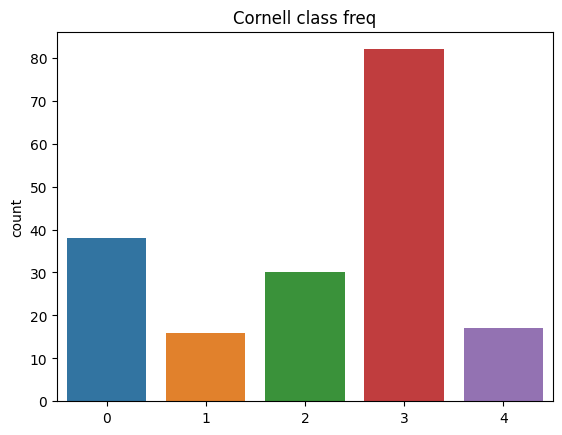

14
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
14
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 8.461979
[1] -2064
[1] -145.9156
[1] -145.9156
  [1] 1 1 5 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 1 3 5 1 1 1 3 3 1 1 1 4 2 5 1 5 1
 [38] 2 1 1 1 5 4 1 1 1 1 1 1 1 4 5 4 3 1 1 1 1 1 3 2 1 5 4 5 4 5 5 3 1 1 1 2 5
 [75] 3 1 2 3 3 1 2 5 3 5 1 5 5 5 1 1 2 1 1 1 5 2 3 5 1 1 1 1 1 3 4 2 1 1 1 1 1
[112] 2 1 2 2 5 4 4 1 1 1 1 1 1 1 1 4 2 1 1 1 1 1 1 5 2 1 4 5 1 1 5 1 5 1 3 4 1
[149] 1 4 1 1 3 2 1 3 1 1 1 1 3 4 2 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 1 1 1 3 3
[1] "this is the new error!!!"
[1] 8.709919
14
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
14
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 9.110786
[1] -2040.564
[1] -207.1733
[1] -207.1733
  [1] 1 1 4 1 1 1 5 2 2 1 1 1 2 1 1 1 2 1 1 1 1 3 5 1 1 4 3 3 1 1 1 5 2 5 1 5 1
 [38] 2 1 1 1 4 5 1 1 1 1 1 1 1 1 5 5 3 1 1 1 1 1 3 2 1 5 1 5 5 5 4 3 1 1 1 2 5
 [75] 3 1 2 3 3 1 2 5 3 5 1 5 5 5 1 1 2 1 1 1 5 2 3 5 1 1 1 1 1 3 5 2 1 1 1 1 1
[112] 2 1 2 2 5 1 4 1 1 1 1 1 1 1 1 1 2 5 1 1 1 1 1 5 2 1 1 5 1 1 5 1 5 1 3 1 1
[149] 1 4 1 1 3 2 1 3 1 1 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 3 3
[1] "this is the new error!!!"
[1] 9.316994
14
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
14
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 9.110786
[1] -2040.564
[1] -207.1733
[1] -207.1733
  [1] 1 1 4 1 1 1 5 2 2 1 1 1 2 1 1 1 2 1 1 1 1 3 5 1 1 4 3 3 1 1 1 5 2 5 1 5 1
 [38] 2 1 1 1 4 5 1 1 1 1 1 1 1 1 5 5 3 1 1 1 1 1 3 2 1 5 1 5 5 5 4 3 1 1 1 2 5
 [75] 3 1 2 3 3 1 2 5 3 5 1 5 5 5 1 1 2 1 1 1 5 2 3 5 1 1 1 1 1 3 5 2 1 1 1 1 1
[112] 2 1 2 2 5 1 4 1 1 1 1 1 1 1 1 1 2 5 1 1 1 1 1 5 2 1 1 5 1 1 5 1 5 1 3 1 1
[149] 1 4 1 1 3 2 1 3 1 1 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 3 3
[1] "this is the new error!!!"
[1] 9.316994
14
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
14
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 8.461979
[1] -2064
[1] -145.9156
[1] -145.9156
  [1] 1 1 5 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 1 3 5 1 1 1 3 3 1 1 1 4 2 5 1 5 1
 [38] 2 1 1 1 5 4 1 1 1 1 1 1 1 4 5 4 3 1 1 1 1 1 3 2 1 5 4 5 4 5 5 3 1 1 1 2 5
 [75] 3 1 2 3 3 1 2 5 3 5 1 5 5 5 1 1 2 1 1 1 5 2 3 5 1 1 1 1 1 3 4 2 1 1 1 1 1
[112] 2 1 2 2 5 4 4 1 1 1 1 1 1 1 1 4 2 1 1 1 1 1 1 5 2 1 4 5 1 1 5 1 5 1 3 4 1
[149] 1 4 1 1 3 2 1 3 1 1 1 1 3 4 2 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 1 1 1 3 3
[1] "this is the new error!!!"
[1] 8.709919
14
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
14
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"
[1] "this is the initial error!!!"
[1] 8.461979



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -2064
[1] -145.9156
[1] -145.9156
  [1] 1 1 5 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 1 3 5 1 1 1 3 3 1 1 1 4 2 5 1 5 1
 [38] 2 1 1 1 5 4 1 1 1 1 1 1 1 4 5 4 3 1 1 1 1 1 3 2 1 5 4 5 4 5 5 3 1 1 1 2 5
 [75] 3 1 2 3 3 1 2 5 3 5 1 5 5 5 1 1 2 1 1 1 5 2 3 5 1 1 1 1 1 3 4 2 1 1 1 1 1
[112] 2 1 2 2 5 4 4 1 1 1 1 1 1 1 1 4 2 1 1 1 1 1 1 5 2 1 4 5 1 1 5 1 5 1 3 4 1
[149] 1 4 1 1 3 2 1 3 1 1 1 1 3 4 2 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 1 1 1 3 3
[1] "this is the new error!!!"
[1] 8.709919

CURRENT DATASET:  Texas


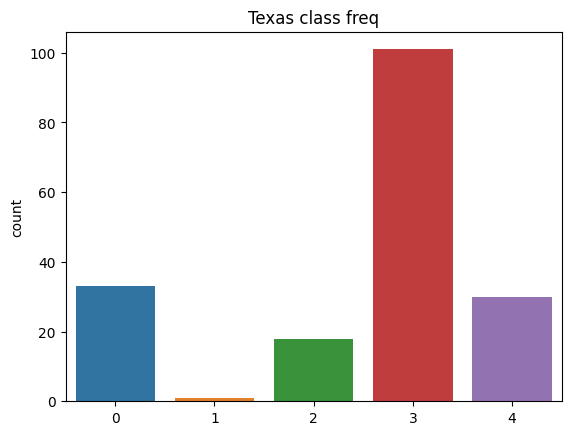

13
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
13
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"
[1] "this is the initial error!!!"
[1] 9.361861



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -2126.679
[1] -56.64888
[1] -56.64888
  [1] 2 4 2 5 3 2 4 4 2 4 2 3 2 2 2 3 2 2 3 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 [38] 2 2 3 4 3 4 2 2 2 2 3 3 2 4 2 4 2 3 2 2 2 2 2 3 3 2 2 3 2 4 2 2 2 3 2 2 3
 [75] 3 2 4 2 4 2 3 2 2 3 2 3 2 2 4 2 2 2 5 3 3 3 2 2 2 3 1 5 2 2 2 4 2 2 2 1 2
[112] 4 2 4 4 2 2 3 2 4 2 4 2 3 2 2 3 2 2 2 3 3 3 2 2 5 2 2 1 3 3 2 2 2 2 2 2 2
[149] 2 3 2 2 2 2 2 2 4 2 4 3 2 2 3 2 4 2 2 2 1 2 2 3 2 2 5 2 2 3 2 2 3 2 2
[1] "this is the new error!!!"
[1] 9.774463
13
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
13
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"
[1] "this is the initial error!!!"
[1] 9.361861



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -2126.679
[1] -56.64888
[1] -56.64888
  [1] 2 4 2 5 3 2 4 4 2 4 2 3 2 2 2 3 2 2 3 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 [38] 2 2 3 4 3 4 2 2 2 2 3 3 2 4 2 4 2 3 2 2 2 2 2 3 3 2 2 3 2 4 2 2 2 3 2 2 3
 [75] 3 2 4 2 4 2 3 2 2 3 2 3 2 2 4 2 2 2 5 3 3 3 2 2 2 3 1 5 2 2 2 4 2 2 2 1 2
[112] 4 2 4 4 2 2 3 2 4 2 4 2 3 2 2 3 2 2 2 3 3 3 2 2 5 2 2 1 3 3 2 2 2 2 2 2 2
[149] 2 3 2 2 2 2 2 2 4 2 4 3 2 2 3 2 4 2 2 2 1 2 2 3 2 2 5 2 2 3 2 2 3 2 2
[1] "this is the new error!!!"
[1] 9.774463
13
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
13
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"
[1] "this is the initial error!!!"
[1] 9.361861



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -2126.679
[1] -56.64888
[1] -56.64888
  [1] 2 4 2 5 3 2 4 4 2 4 2 3 2 2 2 3 2 2 3 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 [38] 2 2 3 4 3 4 2 2 2 2 3 3 2 4 2 4 2 3 2 2 2 2 2 3 3 2 2 3 2 4 2 2 2 3 2 2 3
 [75] 3 2 4 2 4 2 3 2 2 3 2 3 2 2 4 2 2 2 5 3 3 3 2 2 2 3 1 5 2 2 2 4 2 2 2 1 2
[112] 4 2 4 4 2 2 3 2 4 2 4 2 3 2 2 3 2 2 2 3 3 3 2 2 5 2 2 1 3 3 2 2 2 2 2 2 2
[149] 2 3 2 2 2 2 2 2 4 2 4 3 2 2 3 2 4 2 2 2 1 2 2 3 2 2 5 2 2 3 2 2 3 2 2
[1] "this is the new error!!!"
[1] 9.774463
13
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
13
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"
[1] "this is the initial error!!!"
[1] 9.361861



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -2126.679
[1] -56.64888
[1] -56.64888
  [1] 2 4 2 5 3 2 4 4 2 4 2 3 2 2 2 3 2 2 3 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 [38] 2 2 3 4 3 4 2 2 2 2 3 3 2 4 2 4 2 3 2 2 2 2 2 3 3 2 2 3 2 4 2 2 2 3 2 2 3
 [75] 3 2 4 2 4 2 3 2 2 3 2 3 2 2 4 2 2 2 5 3 3 3 2 2 2 3 1 5 2 2 2 4 2 2 2 1 2
[112] 4 2 4 4 2 2 3 2 4 2 4 2 3 2 2 3 2 2 2 3 3 3 2 2 5 2 2 1 3 3 2 2 2 2 2 2 2
[149] 2 3 2 2 2 2 2 2 4 2 4 3 2 2 3 2 4 2 2 2 1 2 2 3 2 2 5 2 2 3 2 2 3 2 2
[1] "this is the new error!!!"
[1] 9.774463
13
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
13
Memberships from graph:  (183, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"
[1] "this is the initial error!!!"
[1] 9.361861



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -2126.679
[1] -56.64888
[1] -56.64888
  [1] 2 4 2 5 3 2 4 4 2 4 2 3 2 2 2 3 2 2 3 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 [38] 2 2 3 4 3 4 2 2 2 2 3 3 2 4 2 4 2 3 2 2 2 2 2 3 3 2 2 3 2 4 2 2 2 3 2 2 3
 [75] 3 2 4 2 4 2 3 2 2 3 2 3 2 2 4 2 2 2 5 3 3 3 2 2 2 3 1 5 2 2 2 4 2 2 2 1 2
[112] 4 2 4 4 2 2 3 2 4 2 4 2 3 2 2 3 2 2 2 3 3 3 2 2 5 2 2 1 3 3 2 2 2 2 2 2 2
[149] 2 3 2 2 2 2 2 2 4 2 4 3 2 2 3 2 4 2 2 2 1 2 2 3 2 2 5 2 2 3 2 2 3 2 2
[1] "this is the new error!!!"
[1] 9.774463

CURRENT DATASET:  Wisconsin


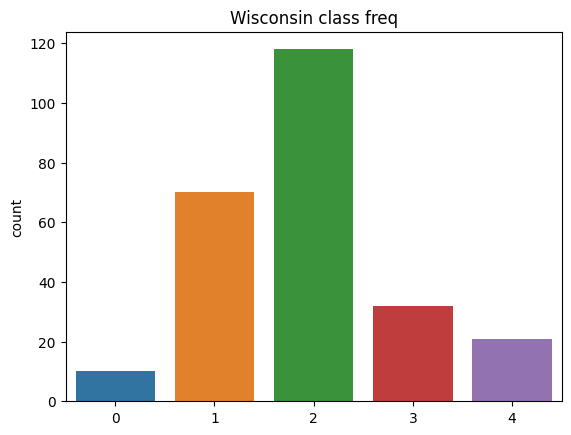

14
Memberships from graph:  (251, 5) 5
Initialisation chosen from the graph
14
Memberships from graph:  (251, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"
[1] "this is the initial error!!!"
[1] 12.23055



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -3029.324
[1] -2372.307
[1] -2372.307
  [1] 2 2 2 2 3 5 5 2 2 1 2 1 2 2 3 2 2 2 1 2 4 5 2 2 5 1 3 1 5 2 2 1 2 2 3 5 5
 [38] 1 3 1 2 2 3 2 2 2 2 1 3 2 1 2 5 5 1 2 2 2 1 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 4 1 2 1 3 2 2 2 3 5 3 2 2 5 2 5 2 3 2 1 2 2 5 5 2 2 2 4 1 2 2 2 2 2 3 2 3
[112] 2 3 3 2 5 4 2 1 2 2 1 2 2 2 2 1 5 2 2 5 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 1 2
[149] 5 4 5 2 3 1 2 2 2 5 3 2 1 2 2 1 2 2 2 5 4 4 2 3 2 1 2 1 1 2 1 1 2 2 2 2 2
[186] 2 2 2 2 3 2 3 1 2 2 2 2 2 2 3 5 3 2 1 5 5 3 2 2 2 1 2 2 3 3 5 2 3 1 1 2 2
[223] 4 1 3 1 2 2 2 2 2 2 2 5 2 2 2 2 2 2 1 2 2 5 2 3 2 2 2 4 2
[1] "this is the new error!!!"
[1] 12.83557
14
Memberships from graph:  (251, 5) 5
Initialisation chosen from the graph
13
Memberships from graph:  (251, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"
[1] "this is the initial error!!!"
[1] 12.23055



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -3029.324
[1] -2372.307
[1] -2372.307
  [1] 2 2 2 2 3 5 5 2 2 1 2 1 2 2 3 2 2 2 1 2 4 5 2 2 5 1 3 1 5 2 2 1 2 2 3 5 5
 [38] 1 3 1 2 2 3 2 2 2 2 1 3 2 1 2 5 5 1 2 2 2 1 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 4 1 2 1 3 2 2 2 3 5 3 2 2 5 2 5 2 3 2 1 2 2 5 5 2 2 2 4 1 2 2 2 2 2 3 2 3
[112] 2 3 3 2 5 4 2 1 2 2 1 2 2 2 2 1 5 2 2 5 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 1 2
[149] 5 4 5 2 3 1 2 2 2 5 3 2 1 2 2 1 2 2 2 5 4 4 2 3 2 1 2 1 1 2 1 1 2 2 2 2 2
[186] 2 2 2 2 3 2 3 1 2 2 2 2 2 2 3 5 3 2 1 5 5 3 2 2 2 1 2 2 3 3 5 2 3 1 1 2 2
[223] 4 1 3 1 2 2 2 2 2 2 2 5 2 2 2 2 2 2 1 2 2 5 2 3 2 2 2 4 2
[1] "this is the new error!!!"
[1] 12.83557
13
Memberships from graph:  (251, 5) 5
Initialisation chosen from the graph
13
Memberships from graph:  (251, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"
[1] "this is the initial error!!!"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] 12.23055
[1] -3029.324
[1] -2372.307
[1] -2372.307
  [1] 2 2 2 2 3 5 5 2 2 1 2 1 2 2 3 2 2 2 1 2 4 5 2 2 5 1 3 1 5 2 2 1 2 2 3 5 5
 [38] 1 3 1 2 2 3 2 2 2 2 1 3 2 1 2 5 5 1 2 2 2 1 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 4 1 2 1 3 2 2 2 3 5 3 2 2 5 2 5 2 3 2 1 2 2 5 5 2 2 2 4 1 2 2 2 2 2 3 2 3
[112] 2 3 3 2 5 4 2 1 2 2 1 2 2 2 2 1 5 2 2 5 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 1 2
[149] 5 4 5 2 3 1 2 2 2 5 3 2 1 2 2 1 2 2 2 5 4 4 2 3 2 1 2 1 1 2 1 1 2 2 2 2 2
[186] 2 2 2 2 3 2 3 1 2 2 2 2 2 2 3 5 3 2 1 5 5 3 2 2 2 1 2 2 3 3 5 2 3 1 1 2 2
[223] 4 1 3 1 2 2 2 2 2 2 2 5 2 2 2 2 2 2 1 2 2 5 2 3 2 2 2 4 2
[1] "this is the new error!!!"
[1] 12.83557
14
Memberships from graph:  (251, 5) 5
Initialisation chosen from the graph
14
Memberships from graph:  (251, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 12.23055
[1] -3029.324
[1] -2372.307
[1] -2372.307
  [1] 2 2 2 2 3 5 5 2 2 1 2 1 2 2 3 2 2 2 1 2 4 5 2 2 5 1 3 1 5 2 2 1 2 2 3 5 5
 [38] 1 3 1 2 2 3 2 2 2 2 1 3 2 1 2 5 5 1 2 2 2 1 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 4 1 2 1 3 2 2 2 3 5 3 2 2 5 2 5 2 3 2 1 2 2 5 5 2 2 2 4 1 2 2 2 2 2 3 2 3
[112] 2 3 3 2 5 4 2 1 2 2 1 2 2 2 2 1 5 2 2 5 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 1 2
[149] 5 4 5 2 3 1 2 2 2 5 3 2 1 2 2 1 2 2 2 5 4 4 2 3 2 1 2 1 1 2 1 1 2 2 2 2 2
[186] 2 2 2 2 3 2 3 1 2 2 2 2 2 2 3 5 3 2 1 5 5 3 2 2 2 1 2 2 3 3 5 2 3 1 1 2 2
[223] 4 1 3 1 2 2 2 2 2 2 2 5 2 2 2 2 2 2 1 2 2 5 2 3 2 2 2 4 2
[1] "this is the new error!!!"
[1] 12.83557
14
Memberships from graph:  (251, 5) 5
Initialisation chosen from the graph
14
Memberships from graph:  (251, 5) 5
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/real_data/att_0.npy"   
[2] "./data/Benchmark/real_data/net_0.npy"   
[3] "./data/Benchmark/real_data/z_init_0.npy"
[1] "this is the initia


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -3029.324
[1] -2372.307
[1] -2372.307
  [1] 2 2 2 2 3 5 5 2 2 1 2 1 2 2 3 2 2 2 1 2 4 5 2 2 5 1 3 1 5 2 2 1 2 2 3 5 5
 [38] 1 3 1 2 2 3 2 2 2 2 1 3 2 1 2 5 5 1 2 2 2 1 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 4 1 2 1 3 2 2 2 3 5 3 2 2 5 2 5 2 3 2 1 2 2 5 5 2 2 2 4 1 2 2 2 2 2 3 2 3
[112] 2 3 3 2 5 4 2 1 2 2 1 2 2 2 2 1 5 2 2 5 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 1 2
[149] 5 4 5 2 3 1 2 2 2 5 3 2 1 2 2 1 2 2 2 5 4 4 2 3 2 1 2 1 1 2 1 1 2 2 2 2 2
[186] 2 2 2 2 3 2 3 1 2 2 2 2 2 2 3 5 3 2 1 5 5 3 2 2 2 1 2 2 3 3 5 2 3 1 1 2 2
[223] 4 1 3 1 2 2 2 2 2 2 2 5 2 2 2 2 2 2 1 2 2 5 2 3 2 2 2 4 2
[1] "this is the new error!!!"
[1] 12.83557


{'NMI': [0.0819730395104857,
  0.1830423346025127,
  0.08996284711214109,
  0.1749248230709821,
  0.0780492574510564,
  0.46413363125234497,
  0.502747643225093,
  0.48797716604826513,
  0.04830155267175769,
  0.18627475790367282,
  0.09380540359964615,
  0.20564039370531453,
  0.045227626969675694,
  0.4028477747473119,
  0.41486987118645996,
  0.371938342859074,
  0.04492048404249611,
  0.2567397373261957,
  0.07285049964226184,
  0.07553845673267919,
  0.0409308213525547,
  0.3818220864790788,
  0.4680263909029815,
  0.43343388715348896],
 'NMI_std': [0.0006327370051563054,
  0.0021509826227005817,
  0.005298189759082711,
  0.011124205346974492,
  0.0005106524484212103,
  0.018334237696789428,
  0.0023978513938502652,
  0.024464401944332827,
  0.0054291592785279275,
  0.0,
  0.019664287332416028,
  0.0,
  0.004840008945481575,
  0.04138947139947162,
  0.0,
  0.0,
  0.004980151600205493,
  0.0,
  0.012136813094324251,
  0.0,
  0.005312379204183897,
  0.022568222807489286,
  5.5511151

In [10]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
benchmark = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False,
                    initializer = 'chernoff',
                    hard_clustering=True)
scores = benchmark.run_real_data(n_iters=25,n_runs=5)
scores

In [11]:
df = pd.DataFrame(scores)
df_grouped = df.groupby(by="dataset")
for key, item in df_grouped:
    print(df_grouped.get_group(key), "\n\n")

        NMI   NMI_std       ARI   ARI_std       AMI   AMI_std       S&S  \
0  0.081973  0.000633 -0.000705  0.000917  0.050431  0.000657  0.499646   
1  0.183042  0.002151  0.131726  0.012026  0.156797  0.003033  0.566088   
2  0.089963  0.005298 -0.008725  0.007872  0.059499  0.004572  0.495629   
3  0.174925  0.011124  0.044834  0.034333  0.147516  0.010210  0.522526   
4  0.078049  0.000511 -0.003955  0.001107  0.046069  0.000546  0.498020   
5  0.464134  0.018334  0.400645  0.022857  0.442967  0.019187  0.709246   
6  0.502748  0.002398  0.411495  0.012379  0.483229  0.002228  0.715386   
7  0.487977  0.024464  0.428614  0.031726  0.468282  0.025738  0.721288   

    S&S_std        CC    CC_std      algorithm  dataset  
0  0.000460 -0.000707  0.000919      both_hard  Cornell  
1  0.006140  0.132095  0.012232   both_hard+SC  Cornell  
2  0.003941 -0.008740  0.007881      both_soft  Cornell  
3  0.017146  0.045023  0.034292   both_soft+SC  Cornell  
4  0.000554 -0.003960  0.001108   

In [12]:
df

,NMI,NMI_std,ARI,ARI_std,AMI,AMI_std,S&S,S&S_std,CC,CC_std,algorithm,dataset
0,0.081973,6.327370e-04,-0.000705,9.167757e-04,0.050431,6.568476e-04,0.499646,0.000460,-0.000707,9.191918e-04,both_hard,Cornell
1,0.183042,2.150983e-03,0.131726,1.202617e-02,0.156797,3.032694e-03,0.566088,0.006140,0.132095,1.223231e-02,both_hard+SC,Cornell
2,0.089963,5.298190e-03,-0.008725,7.872425e-03,0.059499,4.572461e-03,0.495629,0.003941,-0.008740,7.880521e-03,both_soft,Cornell
3,0.174925,1.112421e-02,0.044834,3.433276e-02,0.147516,1.021024e-02,0.522526,0.017146,0.045023,3.429232e-02,both_soft+SC,Cornell
4,0.078049,5.106524e-04,-0.003955,1.106505e-03,0.046069,5.462470e-04,0.498020,0.000554,-0.003960,1.107506e-03,leiden(init),Cornell
5,0.464134,1.833424e-02,0.400645,2.285718e-02,0.442967,1.918750e-02,0.709246,0.011585,0.416886,2.311260e-02,GMM(init),Cornell
6,0.502748,2.397851e-03,0.411495,1.237918e-02,0.483229,2.227733e-03,0.715386,0.004762,0.429076,9.656291e-03,SC_gaussian_2,Cornell
7,0.487977,2.446440e-02,0.428614,3.172633e-02,0.468282,2.573764e-02,0.721288,0.014454,0.441201,2.906943e-02,attSBM,Cornell
8,0.048302,5.429159e-03,0.027365,6.318322e-03,0.015552,5.608594e-03,0.514002,0.003282,0.027932,6.533926e-03,both_hard,Texas
9,0.186275,0.000000e+00,0.123917,1.387779e-17,0.160016,0.000000e+00,0.568376,0.000000,0.134588,0.000000e+00,both_hard+SC,Texas


In [ ]:
df[['NMI', 'NMI_std', 'ARI', 'ARI_std', 'AMI', 'AMI_std', 'algorithm', 'dataset']].to_csv("results_1.csv",index=False)
df[[ 'S&S', 'S&S_std', 'CC', 'CC_std', 'algorithm', 'dataset']].to_csv("results_2.csv",index=False)

In [ ]:
with open(f'/content/drive/MyDrive/test_real_data_{edgeSimilarity}.pickle', 'wb') as handle:
    pickle.dump(scores, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
scores=None
with open(f"/content/drive/MyDrive/test_real_data_{edgeSimilarity}.pickle", 'rb') as handle:
    scores = pickle.load(handle)
scores.keys()

In [ ]:
from google.colab import runtime
runtime.unassign()

# Begin Plots

In [ ]:
from BregmanTests.utils import *

In [ ]:
test_2_1=None
with open("/content/drive/MyDrive/test_2_1.pickle", 'rb') as handle:
    test_2_1 = pickle.load(handle)
test_2_1.keys()

In [ ]:
scatter_(test_2_1,'a', 'r', 'ARI')

In [ ]:
scatter_with_colorbar(test_2_1,'a', 'r', 'ARI')

In [ ]:
test_2_4=None
SIZE_TITLE = 24
SIZE_LABELS = 24
SIZE_TICKS = 18
SIZE_LEGEND = 18
with open("/content/drive/MyDrive/test_2_4.pickle", 'rb') as handle:
    test_2_4 = pickle.load(handle)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
x,y,z = np.array(test_2_4["lambda_att"]),np.array(test_2_4["lambda_w"]),np.array(test_2_4["ARI"])
xlabel="attributes_avg"
ylabel="weights_avg"
C = ax.scatter(x=1/x,y=1/y,c=z,cmap="coolwarm")
plt.ylim(0.9,3.5)
ticks = np.linspace(z.min(), z.max(), 5, endpoint=True)
cb = fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI',ticks=ticks)
cb.set_label(label='ARI', size=SIZE_LEGEND)
cb.ax.tick_params(labelsize=SIZE_TICKS)
plt.xlabel( xlabel, fontsize = SIZE_LABELS )
plt.ylabel( ylabel, fontsize = SIZE_LABELS )
plt.xticks( fontsize = SIZE_TICKS )
plt.yticks( fontsize = SIZE_TICKS )
plt.show()

In [ ]:
x,y,z = test_2_1["a"],test_2_1["r"],test_2_1["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0]).T
make_contour_plot(vals_x,vals_y,z,x_label="a",y_label="r",filename="contour_plot_2_1.jpeg")

In [ ]:
test_2_2=None
with open("/content/drive/MyDrive/test_2_2.pickle", 'rb') as handle:
    test_2_2 = pickle.load(handle)
test_2_2.keys()

In [ ]:
scatter_(test_2_2,'d', 'mu', 'ARI')

In [ ]:
x,y,z = test_2_2["d"],test_2_2["mu"],test_2_2["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
# x,y = np.meshgrid(vals_x,vals_y)
z = np.array(z).reshape(len(vals_x),len(vals_y)).T
make_contour_plot(vals_x,vals_y,z,x_label="d",y_label="mu",filename="contour_plot_2_2.jpeg")

In [ ]:
test_2_3=None
with open("/content/drive/MyDrive/test_2_3.pickle", 'rb') as handle:
    test_2_3 = pickle.load(handle)
test_2_3.keys()

In [ ]:
x,y,z,data = test_2_3["d"],test_2_3["lambda"], test_2_3["a"],test_2_3["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
vals_z = np.unique(z)
"""
len(X) == N is the number of columns in data,
len(Y) == M is the number of rows in data.
len(Z) == P is the depth of data
DATA = M x N X P
"""
X = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
data = np.array(data).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
x_label="d"
y_label="lambda"
z_label = "a"

kw = {
        # 'vmin': data.min(),
        # 'vmax': data.max()
    }

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot contour surfaces
    ### This is the X x Y plane for z=zmax
_ = ax.contourf(
            X[:, :, -1], Y[:, :, -1], data[:, :, -1],
            zdir='z', offset=zmax, **kw
        )

    ### This is the X x Y plane for z=zmin
_ = ax.contourf(
            X[:, :, 0], Y[:, :, 0], data[:, :, 0],
            zdir='z', offset=zmin, **kw
        )

    ### This is the X x Z plane for y=ymax
_ = ax.contourf(
            X[-1, :, :], data[-1, :, :], Z[-1, :, :],
            zdir='y', offset=ymax, **kw
        )

    ### This is the X x Z plane for y=ymin
_ = ax.contourf(
            X[0, :, :], data[0, :, :], Z[0, :, :],
            zdir='y', offset=ymin, **kw
        )

    ### This is the Y x Z plane for x=xmax
_ = ax.contourf(
            data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
            zdir='x', offset=xmax, **kw
        )

    ### This is the Y x Z plane for x=xmin
C = ax.contourf(
            data[:, 0, :], Y[:, 0, :], Z[:, 0, :],
            zdir='x', offset=xmin, **kw
        )


# Plot edges
edges_kw = dict(color='0.4', linewidth=1,zorder=-1e3)
ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )

# Set zoom and angle view
ax.view_init(30, 45, 0)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI')

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )
C = ax.scatter(xs=X,ys=Y,zs=Z,c=data)
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.2, label='ARI')
plt.show()